In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os
zip_path = "archive.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("brain_tumor_dataset")
extracted_path = "brain_tumor_dataset"
os.listdir(extracted_path)


['Training', 'Testing']

In [ ]:
import cv2
import numpy as np

IMG_SIZE = 128
DATA_DIR = "brain_tumor_dataset/Training"
categories = os.listdir(DATA_DIR)

X = []
y = []

label_map = {cat: i for i, cat in enumerate(categories)}
print("Label Mapping:", label_map)

for category in categories:
    folder = os.path.join(DATA_DIR, category)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(label_map[category])

X = np.array(X) / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

from tensorflow.keras.utils import to_categorical
y = to_categorical(y)


Label Mapping: {'glioma': 0, 'pituitary': 1, 'notumor': 2, 'meningioma': 3}


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


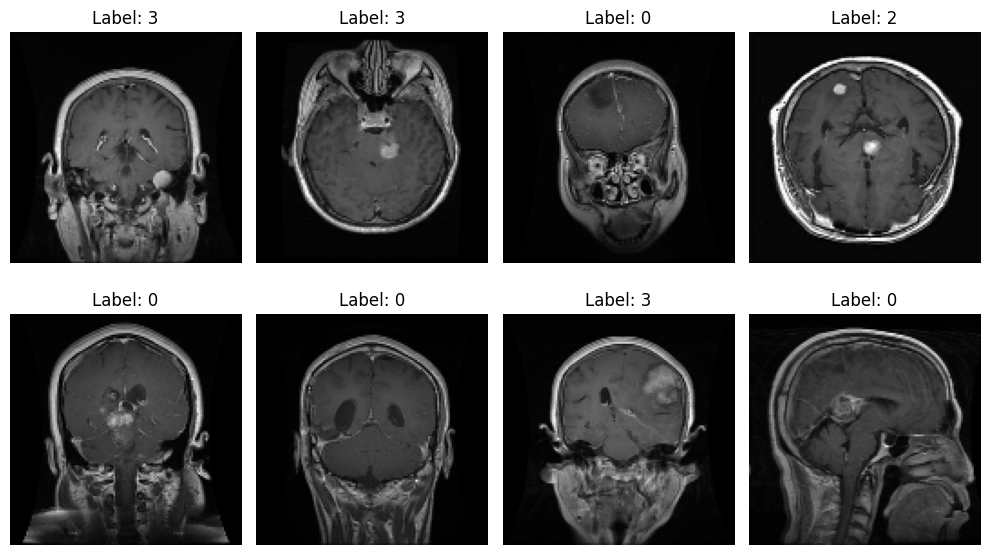

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_train[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 107s 731ms/step - accuracy: 0.6110 - loss: 0.9671 - val_accuracy: 0.8119 - val_loss: 0.4713
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 142s 731ms/step - accuracy: 0.8453 - loss: 0.4201 - val_accuracy: 0.8451 - val_loss: 0.3781
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 146s 760ms/step - accuracy: 0.8881 - loss: 0.3009 - val_accuracy: 0.8889 - val_loss: 0.3107
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 138s 734ms/step - accuracy: 0.9144 - loss: 0.2257 - val_accuracy: 0.8810 - val_loss: 0.3341
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 147s 769ms/step - accuracy: 0.9337 - loss: 0.1900 - val_accuracy: 0.8976 - val_loss: 0.3097
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 110s 772ms/step - accuracy: 0.9611 - loss: 0.1148 - val_accuracy: 0.9116 - val_loss: 0.2730
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 142s 770ms/step - accuracy: 0.9625 - loss: 0.1094 - val_accuracy: 0.9221 - val_loss: 0.2563
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 143s 779ms/step - accuracy: 0.9703 -

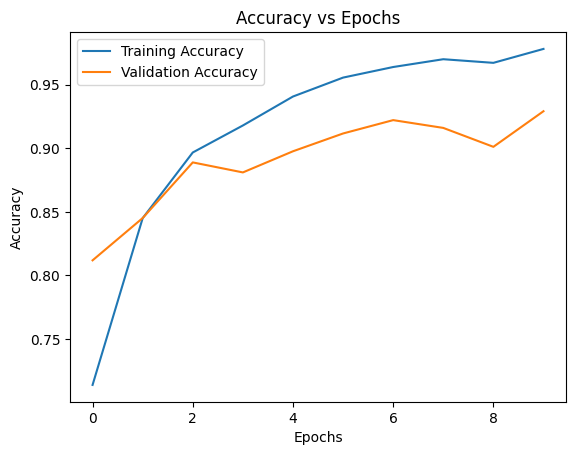

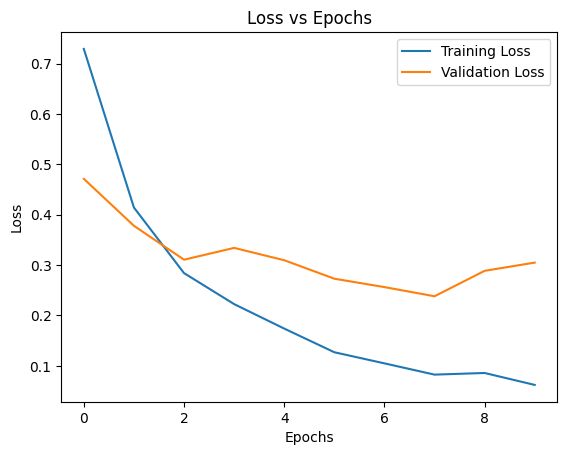

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

test_dir = "brain_tumor_dataset/Testing"
X_test = []
y_test = []

for category in os.listdir(test_dir):
    folder = os.path.join(test_dir, category)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            X_test.append(img)
            y_test.append(label_map[category])

X_test = np.array(X_test) / 255.0
X_test = X_test.reshape(-1, 128, 128, 1)
y_test_cat = to_categorical(y_test)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.array(y_test)

print(classification_report(y_true_labels, y_pred_labels, target_names=label_map.keys()))


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step
              precision    recall  f1-score   support

      glioma       0.93      0.91      0.92       300
   pituitary       0.94      0.99      0.97       300
     notumor       0.97      0.99      0.98       405
  meningioma       0.90      0.84      0.87       306

    accuracy                           0.94      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.94      0.94      0.94      1311



In [ ]:
def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = img.reshape(1, 128, 128, 1)

    pred = model.predict(img)[0]
    pred_label = np.argmax(pred)

    label_names = list(label_map.keys())
    predicted_class = label_names[pred_label]

    plt.bar(label_names, pred)
    plt.title(f"Prediction: {predicted_class}")
    plt.xlabel("Tumor Category")
    plt.ylabel("Prediction Probability")
    plt.ylim(0, 1.0)
    plt.show()

    print(f"Predicted: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


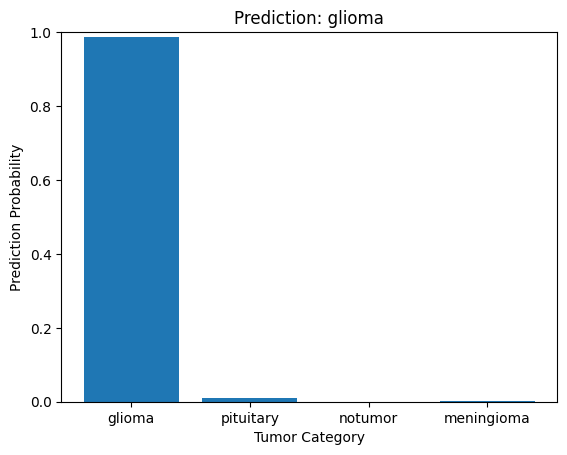

Predicted: glioma


In [ ]:
predict_image("brain_tumor_dataset/Testing/glioma/Te-gl_0011.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


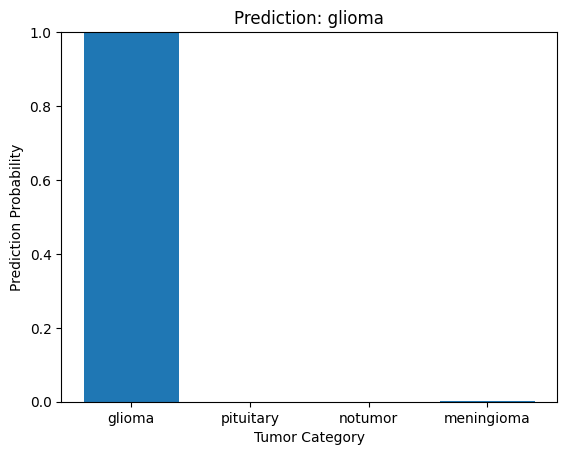

Predicted: glioma


In [ ]:
import random

test_folder = "brain_tumor_dataset/Testing/glioma"
test_images = os.listdir(test_folder)
random_image = random.choice(test_images)

predict_image(os.path.join(test_folder, random_image))


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [ ]:
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
label_map = {cat: i for i, cat in enumerate(categories)}
print(label_map)


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [ ]:
def load_rgb_images(data_dir, label_map, img_size=128):
    X, y = [], []
    for category in label_map:
        folder = os.path.join(data_dir, category)
        for file in os.listdir(folder):
            path = os.path.join(folder, file)
            img = cv2.imread(path)  # loads as RGB
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                X.append(img)
                y.append(label_map[category])
    return np.array(X) / 255.0, to_categorical(y)


In [ ]:
X_rgb, y_rgb = load_rgb_images("brain_tumor_dataset/Training", label_map)

x_train_rgb, x_val_rgb, y_train_rgb, y_val_rgb = train_test_split(
    X_rgb, y_rgb, test_size=0.2, random_state=42
)

print("Train shape:", x_train_rgb.shape)
print("Validation shape:", x_val_rgb.shape)


Train shape: (4569, 128, 128, 3)
Validation shape: (1143, 128, 128, 3)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load base VGG16
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in vgg.layers:
    layer.trainable = False

# Add custom top layers
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # 4 tumor classes

vgg_model = Model(inputs=vgg.input, outputs=output)

vgg_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

vgg_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

vgg_history = vgg_model.fit(
    x_train_rgb, y_train_rgb,
    validation_data=(x_val_rgb, y_val_rgb),
    epochs=1,
    batch_size=32,
    callbacks=[early_stop]
)



143/143 ━━━━━━━━━━━━━━━━━━━━ 1003s 7s/step - accuracy: 0.8603 - loss: 0.4037 - val_accuracy: 0.8854 - val_loss: 0.3107


In [ ]:
X_test_rgb, y_test_rgb = load_rgb_images("brain_tumor_dataset/Testing", label_map)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = vgg_model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_rgb, axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=label_map.keys()))


41/41 ━━━━━━━━━━━━━━━━━━━━ 229s 6s/step
              precision    recall  f1-score   support

      glioma       0.83      0.85      0.84       300
  meningioma       0.79      0.57      0.66       306
     notumor       0.90      0.95      0.92       405
   pituitary       0.82      0.98      0.89       300

    accuracy                           0.84      1311
   macro avg       0.84      0.84      0.83      1311
weighted avg       0.84      0.84      0.84      1311



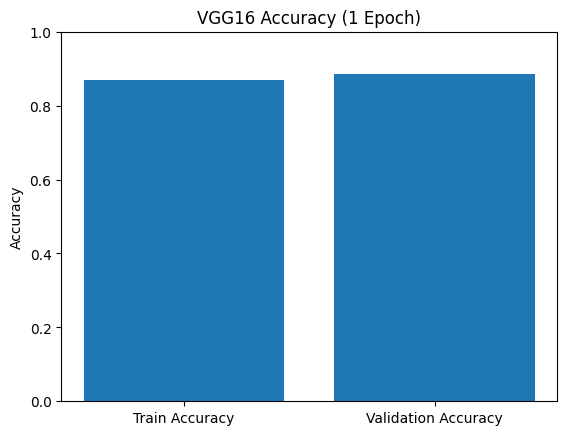

In [ ]:
train_acc = vgg_history.history['accuracy'][0]
val_acc = vgg_history.history['val_accuracy'][0]

plt.bar(['Train Accuracy', 'Validation Accuracy'], [train_acc, val_acc])
plt.ylim(0, 1)
plt.title('VGG16 Accuracy (1 Epoch)')
plt.ylabel('Accuracy')
plt.show()


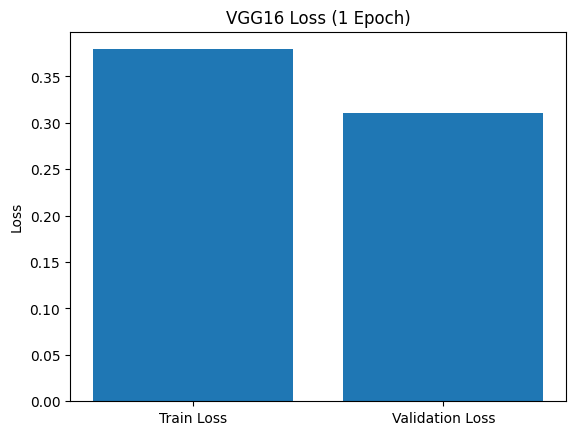

In [ ]:
train_loss = vgg_history.history['loss'][0]
val_loss = vgg_history.history['val_loss'][0]

plt.bar(['Train Loss', 'Validation Loss'], [train_loss, val_loss])
plt.title('VGG16 Loss (1 Epoch)')
plt.ylabel('Loss')
plt.show()
